In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string, sys
sys.path += ['../']
import config
import data
import process
from data import *
%matplotlib inline

## Dataset Exploration

In [2]:
dataset = DataSet()
# dataset.load_data(config.train_data)
# dataset.save()
dataset.restore()
# dataset.display_hist_classes()

Finished restore data ...


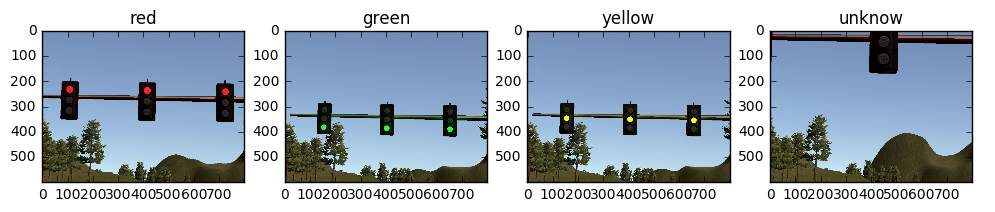

In [3]:
image_r =  dataset.data['red'][1]
image_g =  dataset.data['green'][0]
image_y =  dataset.data['yellow'][0]
image_u =  dataset.data['unknow'][0]

images = [image_r,image_g,image_y,image_u] 
labels = ['red','green','yellow','unknow']

plt.rcParams['figure.figsize'] = (12, 6)
process.plot_images(images,labels)
plt.show()

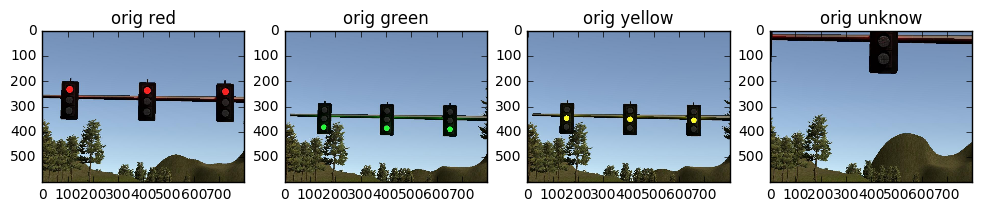

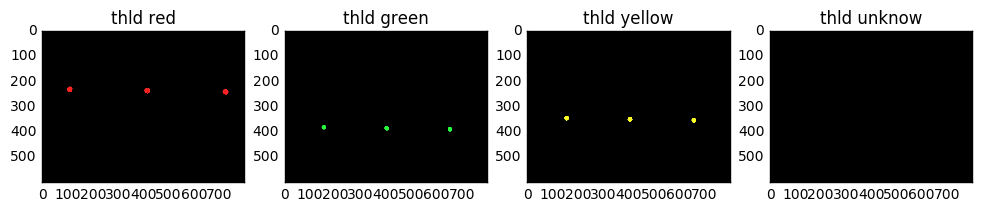

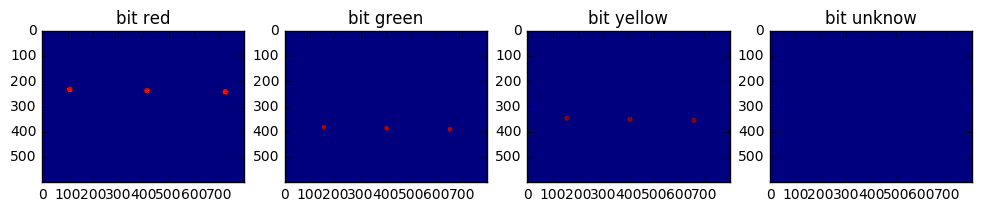

In [11]:
from collections import defaultdict

import cv2 
def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def get_thresholds(image, rgb_threshold):
    
    threshold = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
    return threshold 
    
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#1. Grab the x and y size
height = image_r.shape[0]
width = image_r.shape[1]

#2. Define a kernel size and apply Gaussian smoothing
kernel_size = 3
blur_r = gaussian_blur(np.copy(image_r), kernel_size)
blur_g = gaussian_blur(np.copy(image_g), kernel_size)
blur_y = gaussian_blur(np.copy(image_y), kernel_size)
blur_u = gaussian_blur(np.copy(image_u), kernel_size)

color_select  = defaultdict(list)

# Filter the image to get only red
red_threshold, green_threshold, blue_threshold = 240, 0, 0
rgb_threshold_r = [red_threshold, green_threshold, blue_threshold]

color_select['red'] = blur_r 
thresholds = get_thresholds(color_select['red'], rgb_threshold_r)
color_select['red'][thresholds] = [0,0,0]

# Filter the image to get only green
red_threshold, green_threshold, blue_threshold = 0, 240, 0
rgb_threshold_g = [red_threshold, green_threshold, blue_threshold]

color_select['green'] = blur_g 
thresholds = get_thresholds(color_select['green'], rgb_threshold_g)        
color_select['green'][thresholds] = [0,0,0]

# Filter the image to get only yellow
red_threshold, green_threshold, blue_threshold = 240, 240, 0
rgb_threshold_y = [red_threshold, green_threshold, blue_threshold]

color_select['yellow'] = blur_y 
thresholds = get_thresholds(color_select['yellow'], rgb_threshold_y)        
color_select['yellow'][thresholds] = [0,0,0]


color_select['unknow'] = blur_u 
thresholds_r = get_thresholds(color_select['unknow'], rgb_threshold_r)
thresholds_g = get_thresholds(color_select['unknow'], rgb_threshold_g)
thresholds_y = get_thresholds(color_select['unknow'], rgb_threshold_y)

color_select['unknow'][thresholds_r] = [0,0,0]
color_select['unknow'][thresholds_g] = [0,0,0]
color_select['unknow'][thresholds_y] = [0,0,0]
        
# #3. Convert RGB to HSV
hsv_r = cv2.cvtColor(color_select['red'], cv2.COLOR_RGB2HSV)
hsv_g = cv2.cvtColor(color_select['green'], cv2.COLOR_RGB2HSV)
hsv_y = cv2.cvtColor(color_select['yellow'], cv2.COLOR_RGB2HSV)
hsv_u = cv2.cvtColor(color_select['unknow'], cv2.COLOR_RGB2HSV)

#5. Bitwise-OR the yellow and white images
gray_r = grayscale(color_select['red'])
gray_g = grayscale(color_select['green'])
gray_y = grayscale(color_select['yellow'])
gray_u = grayscale(color_select['unknow'])

plt.rcParams['figure.figsize'] = (12, 6)

images = [image_r,image_g,image_y,image_u] 
labels = ['orig red','orig green','orig yellow', 'orig unknow']
process.plot_images(images,labels)
plt.show()

images = [color_select['red'],color_select['green'],color_select['yellow'],color_select['unknow']] 
labels = ['thld red','thld green','thld yellow','thld unknow', 'bit red','bit green','bit yellow', 'bit unknow']
process.plot_images(images,labels)
plt.show()

images = [gray_r,gray_g,gray_y,gray_u] 
labels = ['bit red','bit green','bit yellow', 'bit unknow']
process.plot_images(images,labels)
plt.show()